Youtube trends analysis for local data warehouse 




 
The data model for each country :

1. Video (CSV)

        video_id (PK) ,

        title , channel_title , publish_time , tags , views , likes ,

        dislikes , comment_count , trending_date , category_id (FK → Category)

2. Category (JSON)

        category_id (PK)

        category_name


In [35]:
import pandas as pd
import json
import matplotlib.pyplot as plt

* The pipeline

    data handling for explaratory data analysis 

In [11]:
def data_transform(x : str) -> pd.DataFrame:

    df_trends = pd.read_csv(f'D:\\youtube trends data\\{x}videos.csv' , encoding='latin1')

    # Extracting from json
    with open(f'D:\\youtube trends data\\{x}_category_id.json', 'r') as file:
        data = json.load(file)
    df_catigories = []
    for i in data['items']:
        df_catigories.append((i['id'],i['snippet']['title']))


    df_catigories = pd.DataFrame(df_catigories, columns= ['category_id','category'])
    df_catigories = df_catigories.astype({'category_id':'int64'}) # type casting to join on same dtype
    df_trends = df_trends[['category_id','views']] # DataFrame modification
    df_top_views = pd.merge(df_trends,df_catigories, on='category_id', how='inner')[['category','views']] # Joining tables
    df = df_top_views.groupby('category').sum('views').sort_values(by='views', ascending=False) # trends_views stats
    
    return df.reset_index()



  * Data extraction

     data ingestion for each country data frame

In [12]:
USA_top_views = data_transform('US')
Russia_top_views = data_transform('RU')
Canada_top_views = data_transform('CA')
France_top_views = data_transform('FR')
India_top_views = data_transform('IN')
Japan_top_views = data_transform('JP')
Mexico_top_views = data_transform('MX')
Germany_top_views = data_transform('DE')

Showing dataset example

In [34]:
Mexico_top_views

,category,views
0,Music,4159713283
1,Entertainment,4027574336
2,Sports,1389337978
3,People & Blogs,1229501908
4,Comedy,794647488
5,News & Politics,491449042
6,Howto & Style,465587429
7,Film & Animation,461919619
8,Gaming,421961773
9,Science & Technology,202863454


Showing visual representations

<Figure size 600x400 with 0 Axes>

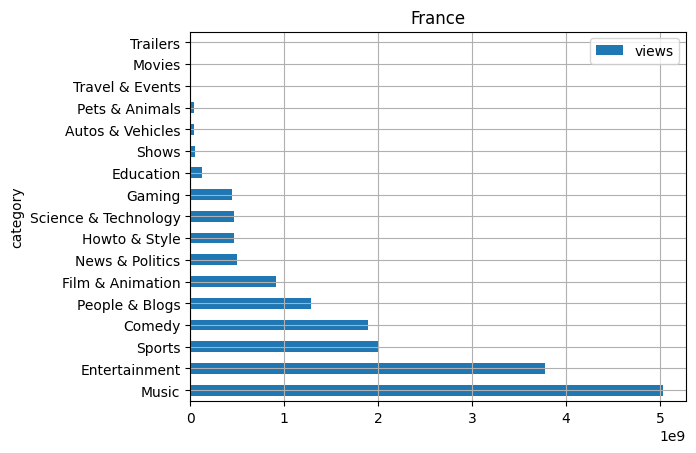

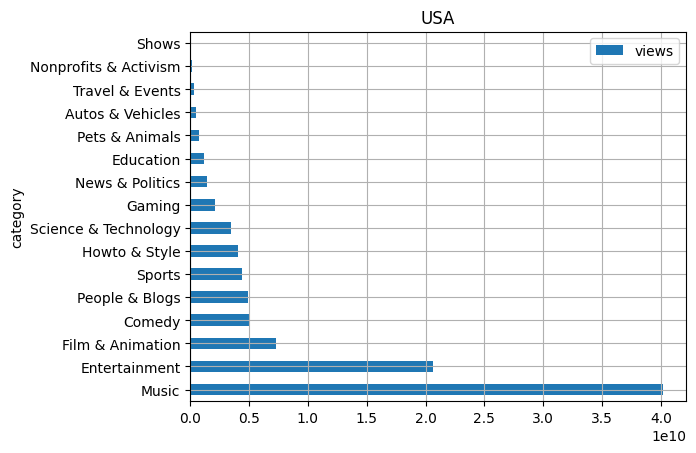

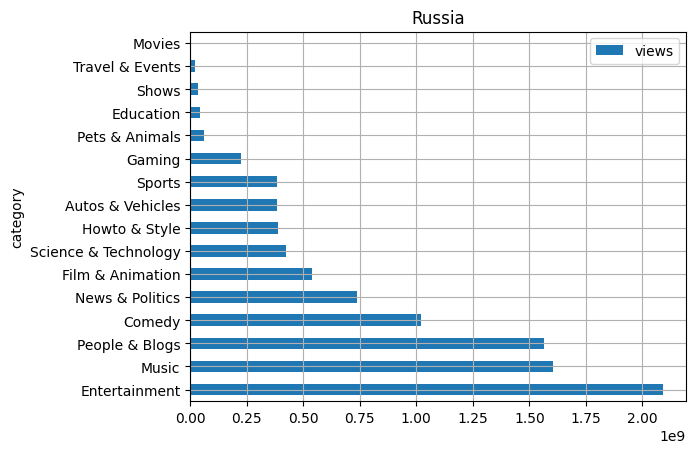

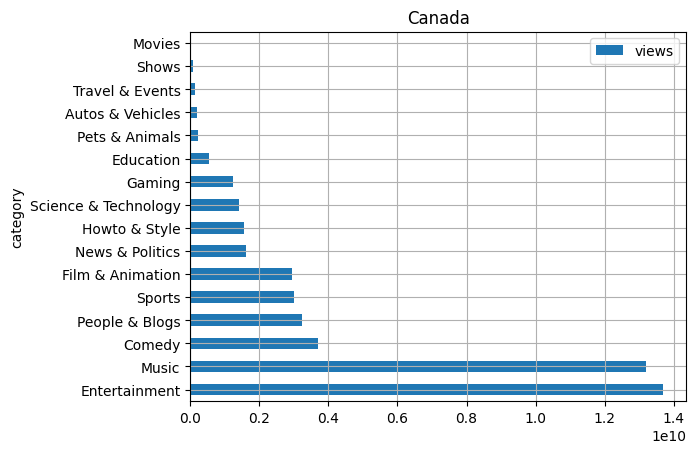

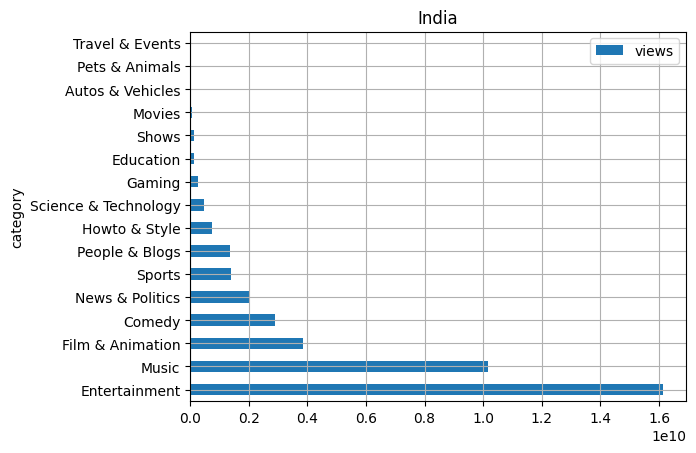

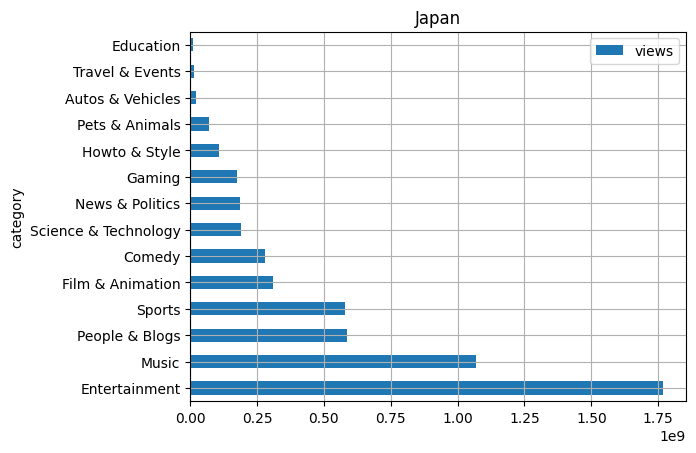

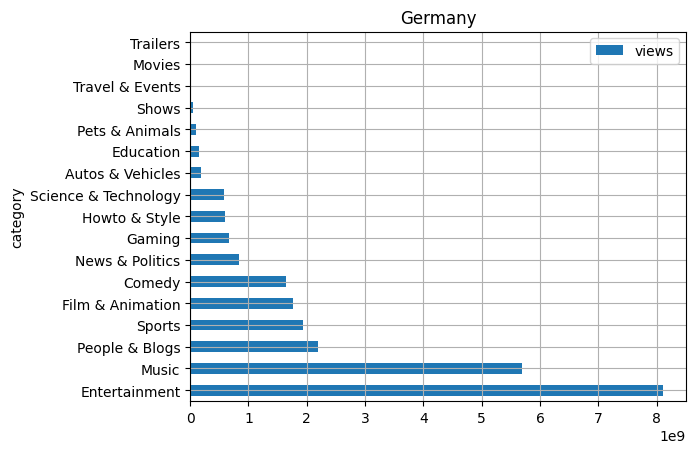

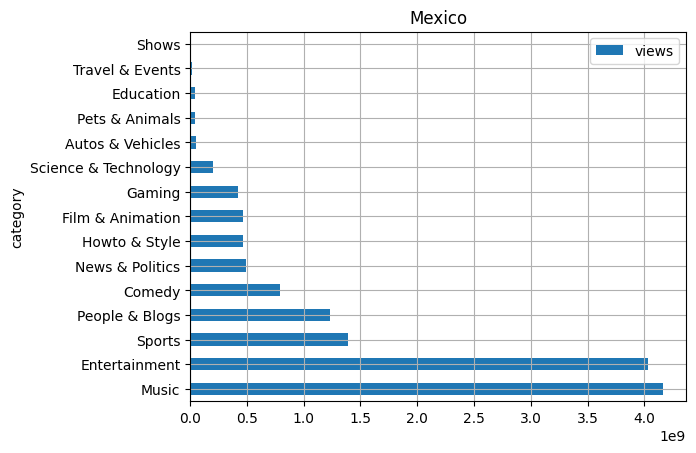

In [45]:
plt.figure(figsize=(6,4))

France_top_views.set_index('category').plot(kind="barh", title="France" ,grid=True)
plt.show()

USA_top_views.set_index('category').plot(kind="barh", title="USA" ,grid=True)
plt.show()

Russia_top_views.set_index('category').plot(kind="barh", title="Russia" ,grid=True)
plt.show()

Canada_top_views.set_index('category').plot(kind="barh", title="Canada" ,grid=True)
plt.show()

India_top_views.set_index('category').plot(kind="barh", title="India" ,grid=True)
plt.show()

Japan_top_views.set_index('category').plot(kind="barh", title="Japan" ,grid=True)
plt.show()

Germany_top_views.set_index('category').plot(kind="barh", title="Germany" ,grid=True)
plt.show()

Mexico_top_views.set_index('category').plot(kind="barh", title="Mexico" ,grid=True)
plt.show()